In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.ticker as tck
import functions as f
from pathlib import Path

In [2]:
t = 20
to_Myr   = 9.78462 # converts from snapshot time units to Myr
Omegap   = 0.4 	   # pattern speed of the bar

In [3]:
FIG_DIR = Path('./../figures/')
X, Y, VX, VY, RHO = np.load(f'./../simulation/simulation/output_npy/data_{t}.npy')

### radial velocity calculation

In [4]:
beta = np.deg2rad(30)
i  = np.deg2rad(50)

In [5]:
VX, VY = f.add_solid_body_rotation(X, Y, VX, VY)
X, Y, VX, VY = f.rotate_bar(beta, X, Y, VX, VY) 
X, Y, VR = f.incline_galaxy(i, X, Y, VX, VY)

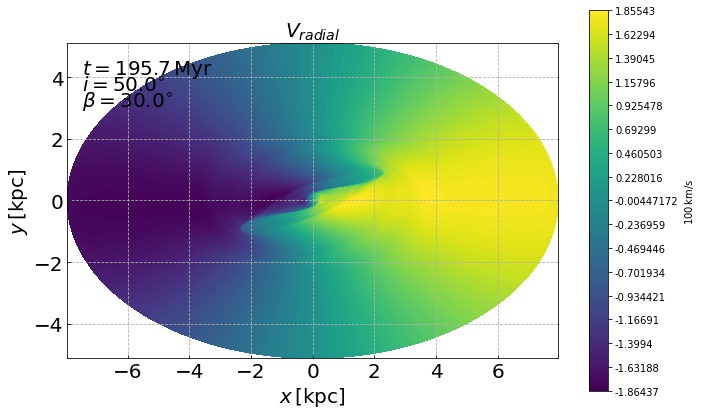

In [6]:
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
levels = np.linspace(VR.min(), VR.max(), 101)
cbarticks = np.linspace(VR.min(), VR.max(), 17)
norm = mc.BoundaryNorm(levels, 256)
im1 = ax.contourf(X, Y, VR, norm=norm, levels=levels, cmap='viridis')
ax.annotate(r'$t=%.1f\, \rm Myr$' % (t * to_Myr), 
            xy=(0.03,0.9), xycoords='axes fraction', fontsize=20, color='k')
ax.annotate(r'$i=%.1f ^{\circ}$' % (np.rad2deg(i)), 
            xy=(0.03,0.85),xycoords='axes fraction', fontsize=20, color='k')
ax.annotate(r'$\beta=%.1f ^{\circ}$' % (np.rad2deg(beta)),
            xy=(0.03,0.8), xycoords='axes fraction', fontsize=20, color='k')

plt.colorbar(im1, ticks=cbarticks, format='%g', label=r'$\rm 100\, km/s$')

ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$x\, \rm [kpc]$', fontsize=20)
ax.set_ylabel(r'$y\, \rm [kpc]$', fontsize=20)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_aspect('1')
ax.set_title(r'$V_{radial}$', fontsize=20)
plt.savefig(FIG_DIR / 'radial_velocity.png', bbox_inches='tight', dpi=300)

In [7]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML

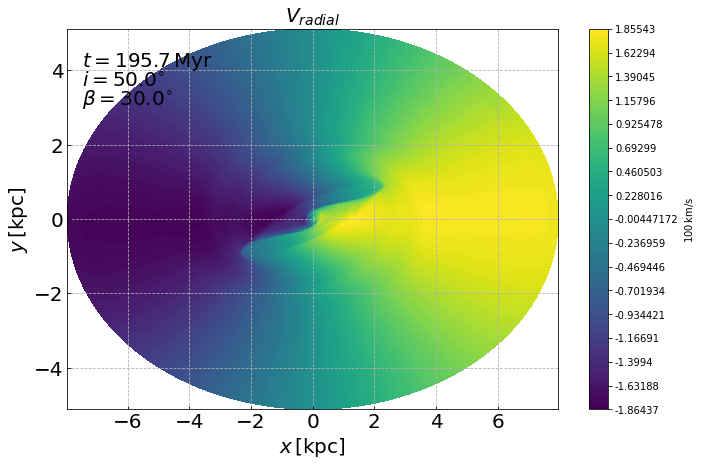

In [11]:
fig, ax = plt.subplots(figsize=(11, 7))

l1 = ax.contourf(X, Y, VR, norm=norm, levels=levels, cmap='viridis')

ax.grid(ls='dashed')
ax.tick_params(labelsize=20,direction='in')
ax.set_xlabel(r'$x\, \rm [kpc]$', fontsize=20)
ax.set_ylabel(r'$y\, \rm [kpc]$', fontsize=20)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_title(r'$V_{radial}$', fontsize=20)
ax.annotate(r'$i=%.1f ^{\circ}$' % (np.rad2deg(i)),
            xy=(0.03, 0.85), xycoords='axes fraction', fontsize=20, color='k')
ax.annotate(r'$\beta=%.1f ^{\circ}$' % (np.rad2deg(beta)),
            xy=(0.03,0.8), xycoords='axes fraction', fontsize=20, color='k')
plt.colorbar(l1, ticks=cbarticks, format='%g', label=r'$\rm 100\, km/s$')
ANN = []
def animate(snap):
    if len(ANN) > 0: 
        for a in ANN:
            a.remove()
    ANN[:] = []
    X, Y, VX, VY, RHO = np.load(f'./../simulation/simulation/output_npy/data_{snap}.npy')
    VX, VY = f.add_solid_body_rotation(X, Y, VX, VY)
    X, Y, VX, VY = f.rotate_bar(beta, X, Y, VX, VY) 
    X, Y, VR = f.incline_galaxy(i, X, Y, VX, VY)

    ax.contourf(X, Y, VR, norm=norm, levels=levels, cmap='viridis')
    annotation = ax.annotate(r'$t=%.1f\, \rm Myr$' % (snap * to_Myr),
                             xy=(0.03, 0.9), xycoords='axes fraction', fontsize=20, color='k')
    ANN.append(annotation)
    
    return l1

ani = FuncAnimation(fig, animate, frames=np.arange(0, 21, 1).astype(int), interval=150)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save(FIG_DIR / 'radial_velocity.mp4', writer=writer, dpi=300)

HTML(ani.to_jshtml())